In [15]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
!cat aSys.o3prm

type Val un,deux;

interface IActor {
    Val Productivity;
    Val Capacity;

    Val Cost;
}

class Actor0 implements IActor{
   Val Productivity {[ 0.8 , 0.2 ]};
   Val Capacity { [ 0.7,0.3]};
   Val Cost dependson Productivity, Capacity {[
       0.2,0.3,0.6,0.9,
       0.8,0.7,0.4,0.1
   ]};
}


class Actor implements IActor{
    IActor[] IA;

    Val Capacity { [ 0.2,0.8]};

    boolean Agg_Productivity = exists (IA.Productivity,un);

    Val Productivity dependson Agg_Productivity {[
     0.9,0.1,
     0.1,0.9
    ]};

   Val Cost dependson Productivity, Capacity {[
       0.2,0.3,0.6,0.9,
       0.8,0.7,0.4,0.1
   ]};
}

system aSys {
    Actor0 A0;
    Actor0 A1;

    Actor A2;

    A2.IA+=A0;
    A2.IA+=A1;
}



In [18]:
bn=gum.loadBN("./aSys.o3prm")
gnb.showBN(bn,size="10")


/home/phw/Documents/gits/lip6/aGrUM-dev/apps/pyAgrum/notebooks/aSys.o3prm:11: 30 : error : Problem with CPF of Productivity (could not find this object : undefined value in cpt).
   Val Productivity {[0.5,0.5]};
                             ^
/home/phw/Documents/gits/lip6/aGrUM-dev/apps/pyAgrum/notebooks/aSys.o3prm:12: 8 : error : Can not create attribute Capacity (invalid state error : illegal sequence of calls).
   Val Capacity { [ 0.7,0.3]};
       ^
/home/phw/Documents/gits/lip6/aGrUM-dev/apps/pyAgrum/notebooks/aSys.o3prm:13: 8 : error : Can not create attribute Cost (invalid state error : illegal sequence of calls).
   Val Cost dependson Productivity, Capacity {[
       ^
/home/phw/Documents/gits/lip6/aGrUM-dev/apps/pyAgrum/notebooks/aSys.o3prm:17: 1 : error : Can not create class Actor0 (invalid state error : illegal sequence of calls).
}
^
/home/phw/Documents/gits/lip6/aGrUM-dev/apps/pyAgrum/notebooks/aSys.o3prm:23: 29 : error : Problem with CPF of Capacity (could not find this 

Exception: Error(s) in ./aSys.o3prm

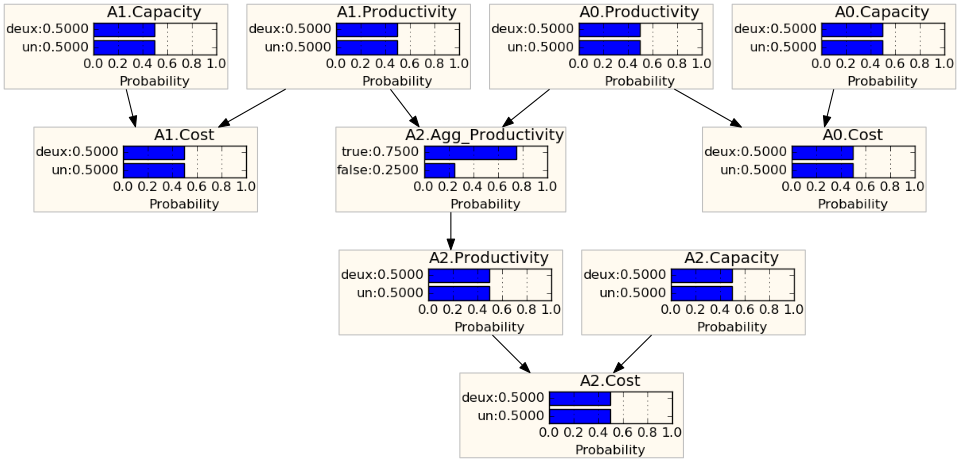

In [6]:
gnb.showInference(bn,size='10')